In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


over_df = pd.read_csv("results/over_sampling_results.csv")
over_df["Sampling"] = "Over"
over_df["PCA"] = over_df["Model"].apply(lambda x: "With PCA" if "pca" in x.lower() else "Without PCA")

under_df = pd.read_csv("results/under_sampling_results.csv")
under_df["Sampling"] = "Under"
under_df["PCA"] = under_df["Model"].apply(lambda x: "With PCA" if "pca" in x.lower() else "Without PCA")
# Combine both DataFrames
final_df = pd.concat([over_df, under_df], ignore_index=True)

# Save to CSV
final_df.to_csv("sampling_comparison.csv", index=False)

In [3]:
# Load the CSV
final_df = pd.read_csv("sampling_comparison.csv")

# Print the data
final_df

,Model,Accuracy,Precision,Recall,F1 Score,AUC,Sampling,PCA
0,RandomForestClassifier_pca,0.959779,0.950549,0.922052,0.936084,0.988902,Over,With PCA
1,AdaBoostClassifier_pca,0.920834,0.857958,0.901399,0.879142,0.976839,Over,With PCA
2,GradientBoostingClassifier_pca,0.961694,0.950239,0.928714,0.939353,0.990254,Over,With PCA
3,XGBoostClassifier_pca,0.957863,0.942896,0.924051,0.933378,0.989330,Over,With PCA
4,Gaussian Naive Bayes Classifier_pca,0.858693,0.734454,0.873418,0.797931,0.892739,Over,With PCA
5,DecisionTreeClassifier_pca,0.955948,0.932487,0.929380,0.930931,0.949624,Over,With PCA
6,RandomForestClassifier,0.971696,0.981013,0.929380,0.954499,0.994254,Over,Without PCA
7,AdaBoostClassifier,0.955735,0.933602,0.927382,0.930481,0.991296,Over,Without PCA
8,GradientBoostingClassifier,0.968930,0.964997,0.936709,0.950642,0.993191,Over,Without PCA
9,XGBoostClassifier,0.970206,0.976875,0.928714,0.952186,0.994120,Over,Without PCA


In [4]:
# Group by Sampling and PCA
grouped = final_df.groupby(["Sampling", "PCA"])
print("\nGrouped Data:")
grouped.mean(numeric_only=True)


Grouped Data:


Accuracy  Precision    Recall  F1 Score       AUC
Sampling PCA                                                           
Over     With PCA     0.935802   0.894764  0.913169  0.902803  0.964615
         Without PCA  0.942647   0.932808  0.879414  0.903889  0.973353
Under    With PCA     0.979281   0.997427  0.976193  0.986562  0.994383
         Without PCA  0.990918   0.998053  0.990439  0.994231  0.997461

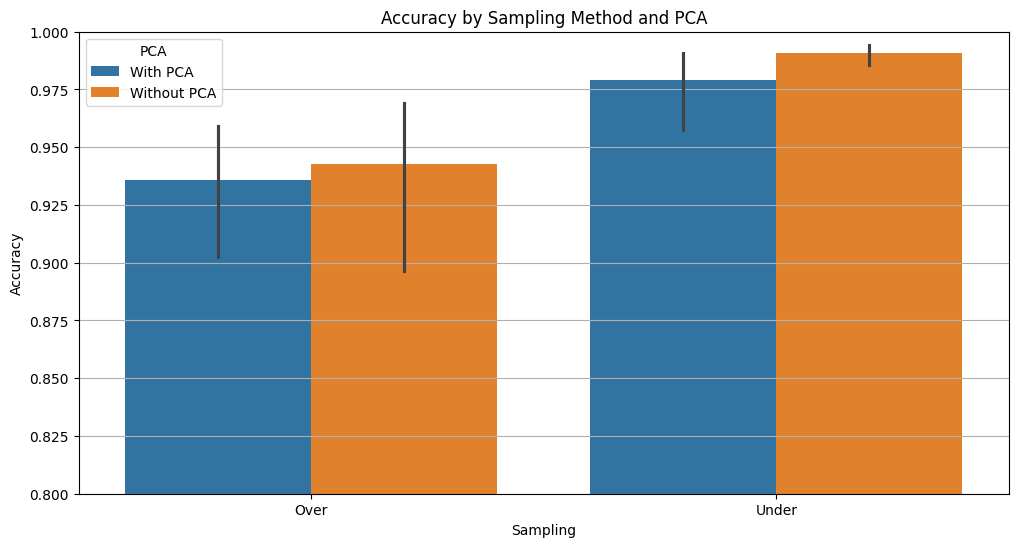

In [5]:
# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=final_df, x="Sampling", y="Accuracy", hue="PCA")
plt.title("Accuracy by Sampling Method and PCA")
plt.ylim(0.8, 1.0)
plt.legend(title="PCA")
plt.grid(axis='y')
plt.show()


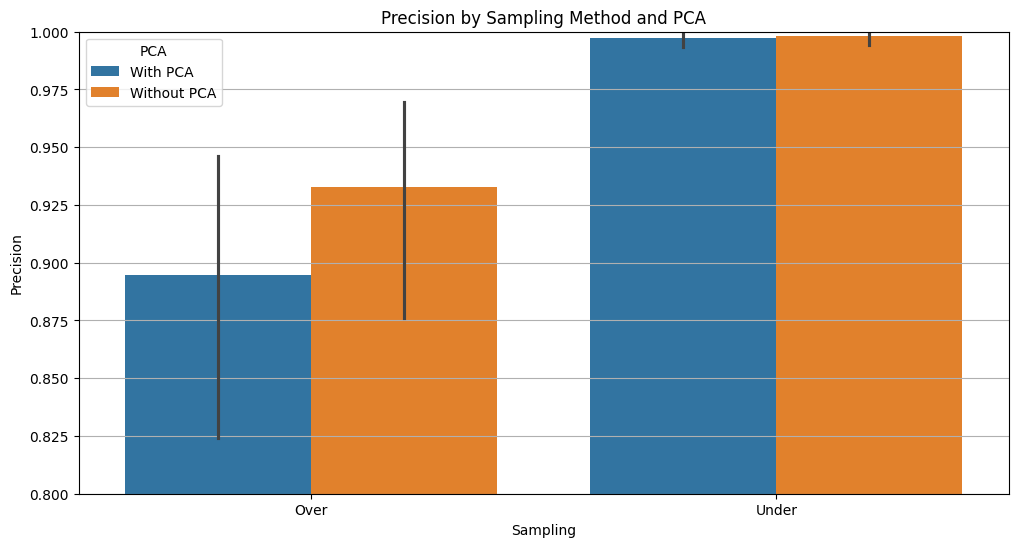

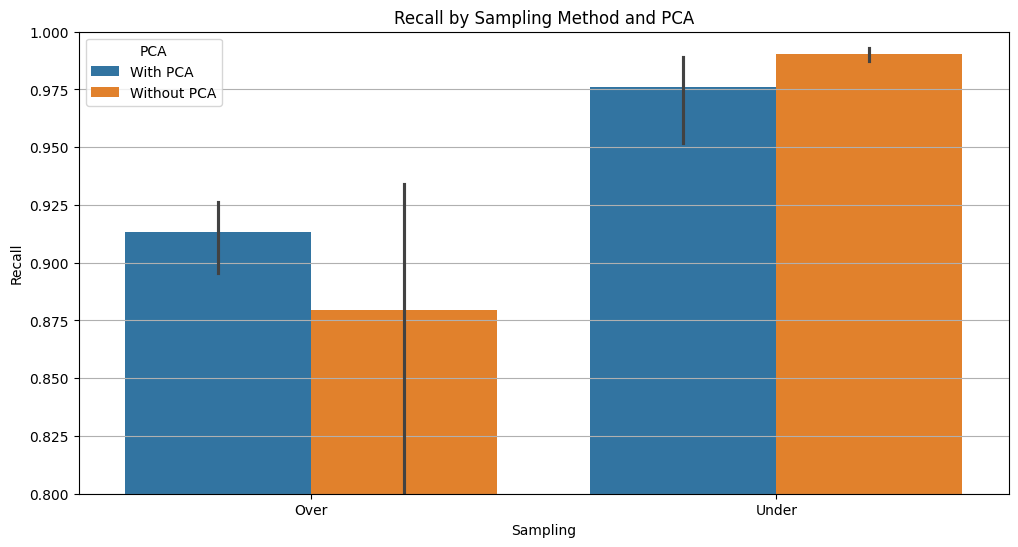

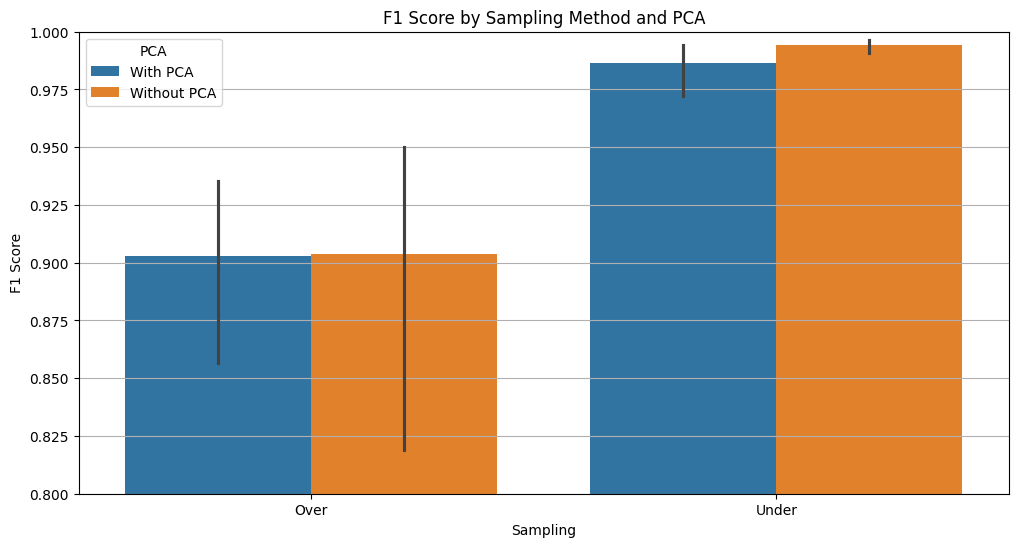

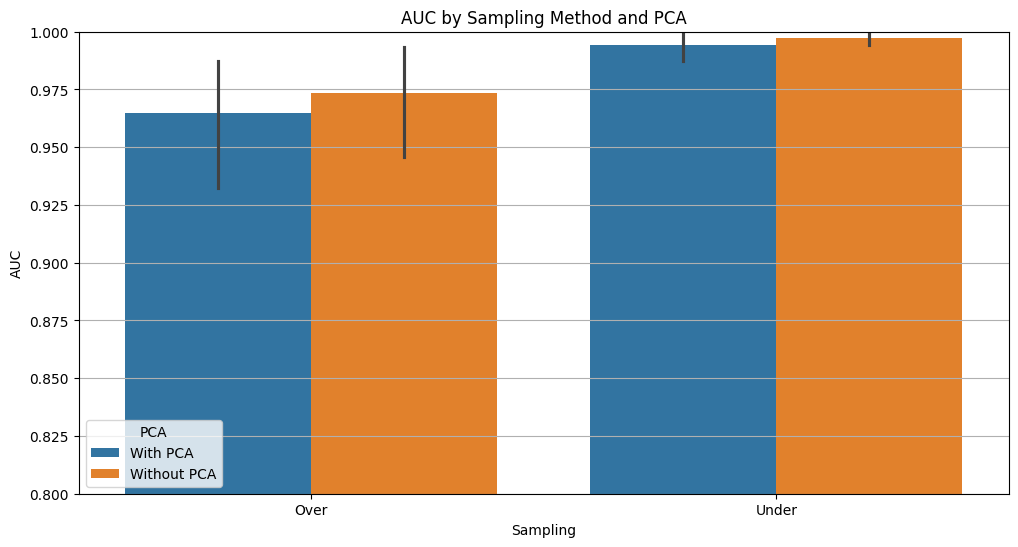

In [6]:
# Additional Helpful Plots
metrics = ["Precision", "Recall", "F1 Score", "AUC"]
for metric in metrics:
    plt.figure(figsize=(12, 6))
    sns.barplot(data=final_df, x="Sampling", y=metric, hue="PCA")
    plt.title(f"{metric} by Sampling Method and PCA")
    plt.ylim(0.8, 1.0)
    plt.legend(title="PCA")
    plt.grid(axis='y')
    plt.show()

In [7]:
# Find the best model based on highest F1 Score
best_model = final_df.loc[final_df["F1 Score"].idxmax()]
print("\nBest Model for F1 Score:")
best_model


Best Model for F1 Score:


,23
Model,DecisionTreeClassifier
Accuracy,0.994785
Precision,0.999428
Recall,0.993968
F1 Score,0.99669
AUC,0.995942
Sampling,Under
PCA,Without PCA


In [8]:
# Find the best model based on the average of the metrics
final_df["Average"] = final_df[["Accuracy", "Precision", "Recall", "F1 Score", "AUC"]].mean(axis=1)
best_model = final_df.loc[final_df["Average"].idxmax()]
print("\nBest Model:")
best_model


Best Model:


,20
Model,GradientBoostingClassifier
Accuracy,0.99465
Precision,0.999885
Recall,0.993342
F1 Score,0.996603
AUC,0.999744
Sampling,Under
PCA,Without PCA
Average,0.996845
